  <tr>
        <td>
            <div align="left">
                <font size=25px>
                    <b>Kmeans Clustering
                    </b>
                </font>
            </div>
        </td>
    </tr>

## Problem Statement:
A key challenge for e-commerce businesses is to analyze the trend in the market to increase their sales. The trend can be easily observed if the companies can group the customers; based on their activity on the e-commerce site.  This grouping can be done by applying different criteria like previous orders, mostly searched brands and so on. The machine learning clustering algorithms can provide an analytical method to cluster customers with similar interests.

## Data Definition:

Input variables:

1) **Cust_ID** Unique numbering for customers

2) **Gender:** Gender of the customer


3) **Orders:** Number of orders placed by each customer in the past


Remaining 35 features contains the number of times customers have searched them

## Content

1. **[Import Packages](#import_packages)**
2. **[Read Data](#Read_Data)**
3. **[Understand and Prepare the Data](#data_preparation)**
    - 3.1 - [Data Types and Dimensions](#Data_Types)
    - 3.2 - [Distribution of Variables](#data_prepartion)
    - 3.3 - [Statistical Summary](#Statistical_Summary)
    - 3.4 - [Missing Data Treatment](#Missing_Data_Treatment)
    - 3.5 - [Visualization](#Visualization)
4. **[K-means Clustering](#modeling)**
    - 4.1 - [Prepare the data](#preparation_of_data)
    - 4.2 - [Build a Model with Multiple K](#model_k)
5. **[Retrieve the Clusters](#retrieve_clusters)**
6. **[Clusters Analysis](#cluster)**
    - 6.1 - [Analysis of Cluster_1](#cluster_1)
    - 6.2 - [Analysis of Cluster_2](#cluster_2)
    - 6.3 - [Analysis of Cluster_3](#cluster_3)
    - 6.4 - [Analysis of Cluster_4](#cluster_4)
7. **[Conclusion](#conclusion)**

<a id='import_packages'></a>
## 1. Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set default setting of seaborn
sns.set()

C:\Users\a\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

<a id='Read_Data'></a>
## 2. Read the Data

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>Read the data using read_excel() function from pandas<br> 
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
# read the data
raw_data = pd.read_excel('cust_data.xlsx', index_col=0)

# print the first five rows of the data
raw_data.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cust_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,M,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,F,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
3,M,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,F,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,NaN,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


<a id='data_preparation'></a>
## 3. Understand and Prepare the Data


<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The process of data preparation entails cleansing, structuring and integrating data to make it ready for analysis. <br><br>
                        Here we will analyze and prepare data :<br>
                        1. Check dimensions and data types of the dataframe <br>
                        2. Study summary statistics<br> 
                        3. Check for missing values<br>
                        4. Visualization<br>
                        5. Study correlation<br>
                                       </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Data_Types'></a>
## 3.1 Data Types and Dimensions

In [4]:
# check the data types for variables
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  27276 non-null  object
 1   Orders                  30000 non-null  int64 
 2   Jordan                  30000 non-null  int64 
 3   Gatorade                30000 non-null  int64 
 4   Samsung                 30000 non-null  int64 
 5   Asus                    30000 non-null  int64 
 6   Udis                    30000 non-null  int64 
 7   Mondelez International  30000 non-null  int64 
 8   Wrangler                30000 non-null  int64 
 9   Vans                    30000 non-null  int64 
 10  Fila                    30000 non-null  int64 
 11  Brooks                  30000 non-null  int64 
 12  H&M                     30000 non-null  int64 
 13  Dairy Queen             30000 non-null  int64 
 14  Fendi                   30000 non-null  int64 
 15  He

In [5]:
# get the shape
print(raw_data.shape)

(30000, 37)


**We see the dataframe has 37 columns and 30000 observations**

<a id='dis'></a>
## 3.2 Distribution of Variables


<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> Check the distribution of the variables <br><br>
                        1. Distribution of orders placed by customers<br>
                        2. Distribution of gender of the customer<br>
                </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Distribution of orders placed by customers**

Check the distribution for the number of orders placed by the customers in the past

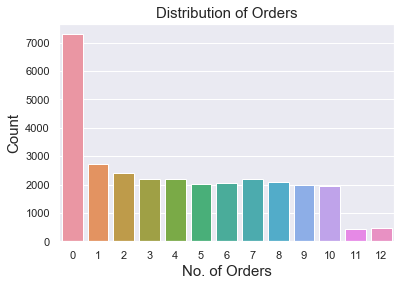

In [6]:
# use 'countplot' to plot barplot for orders
sns.countplot(data = raw_data, x = 'Orders')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Distribution of Orders', fontsize = 15)
plt.xlabel('No. of Orders', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

<table align='left'>
    <tr>
        <td width='8%'>
            <img src='note.png'>
        </td>
        <td>
            <div align='left', style='font-size:120%'>
                    <b>It can be easily seen that most of the customers have no past orders 
                </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**2. Distribution of of gender of the customer**

Plot the barplot to get the count for the gender 

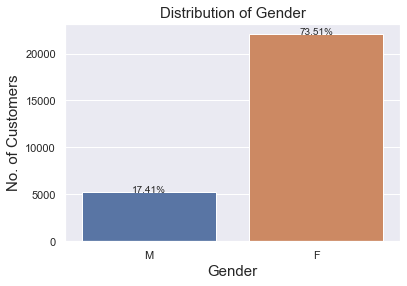

In [7]:
# use 'countplot' to gender-wise calculate the number of customers 
sns.countplot(data= raw_data, x = 'Gender')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Distribution of Gender', fontsize = 15)
plt.xlabel('Gender', fontsize = 15)
plt.ylabel('No. of Customers', fontsize = 15)

# use below code to print the values in the graph
# 'x' and 'y' gives the position of the text
# 's' is the text 
plt.text(x = -0.1, y = raw_data.Gender.value_counts()[1] , s = str(round((raw_data.Gender.value_counts()[1])*100/len(raw_data.Gender),2)) + '%')
plt.text(x = 0.9, y = raw_data.Gender.value_counts()[0] , s = str(round((raw_data.Gender.value_counts()[0])*100/len(raw_data.Gender),2)) + '%')
plt.show()

<table align='left'>
    <tr>
        <td width='8%'>
            <img src='note.png'>
        </td>
        <td>
            <div align='left', style='font-size:120%'>
                    <b>There are more female customers in the data than the male customers<br><br>
                        It can be seen that the variable 'Gender' has lesser observations (percent-wise only 90.92% observations) than the total number of observations. This inconsistency is because of the existence of missing values; we deal with this issue in section 4.5 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Statistical_Summary'></a>
## 3.3 Statistical Summary
Here we take a look at the summary of each attribute. This includes the count, mean, the min and max values as well as some percentiles for numeric variables.

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> In our dataset we have numerical variables. Now we check for summary statistics of all the variables<br>
                        For numerical variables, we use .describe().
          <br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. For numerical variables, use .describe()**

In [8]:
# data frame with numerical features
raw_data.describe()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,0.094267,0.140133,0.328200,0.209333,0.141467,0.161100,0.106100,0.300233,0.048067,0.754800,0.247900,0.470833,0.258000,0.118767,0.031967,0.428033,0.121333,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,0.531592,0.471278,0.807655,1.116820,0.529210,0.604835,0.516512,1.119167,0.338763,1.262166,0.724106,1.346159,0.848288,0.597612,0.264475,1.098876,0.478977,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,15.000000,12.000000,18.000000,114.000000,18.000000,10.000000,26.000000,66.000000,11.000000,64.000000,21.000000,79.000000,44.000000,30.000000,11.000000,37.000000,9.000000,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <b>The above output illustrates the summary statistics of the numeric variables.<br>
                        The customers have placed 4 orders on an average with minimum zero orders and maximum of 12.<br>
                        From the summary output, it can be seen that the considered dataset is sparse; since, for all the variables with brand searches, 75% of the observations are 0
                </b>     
                </font>
            </div>
        </td>
    </tr>
</table>

**2. For categorical variables, use .describe(include=object)**

In [9]:
# summary of the categorical variables
raw_data.describe(include = object)

# Note: If we pass 'include=object' to the .describe() function returns descriptive statistics for categorical variables only

,Gender
count,27276
unique,2
top,F
freq,22054


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <b>The summary contains information about the total number of observations, number of unique classes, the most occurring class and frequency of the same.<br> It can be seen that the mode of the variable 'Gender' is F with 22054 observations
                </b>     
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Missing_Data_Treatment'></a>
## 3.4. Missing Data Treatment
If the missing values are not handled properly we may end up drawing an inaccurate inference about the data. Due to improper handling, the result obtained will differ from the ones where the missing values are present.


<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>In order to get the count of missing values in each column, we use the in-built function .isnull().sum()
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
# sorting variables based on null values
# 'ascending = False' sorts values in the descending order
Total = raw_data.isnull().sum().sort_values(ascending=False)          

# percentage of missing values
Percent = (raw_data.isnull().sum()/raw_data.isnull().count()*100).sort_values(ascending=False)   

# create a dataframe using 'concat' function 
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percent'])    
missing_data

,Total,Percent
Gender,2724,9.08
Asics,0,0.00
Hewlett Packard,0,0.00
Fendi,0,0.00
Dairy Queen,0,0.00
H&M,0,0.00
Brooks,0,0.00
Fila,0,0.00
Vans,0,0.00
Wrangler,0,0.00


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <b> Only the variable 'Gender' has 9% of missing values 
                </b>     
                </font>
            </div>
        </td>
    </tr>
</table>

**We plot a heatmap for visualization of missing values**

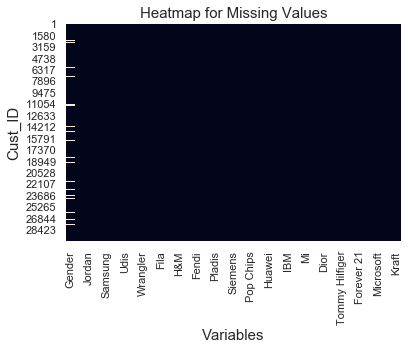

In [11]:
# plot heatmap to check null values
# 'cbar = False' does not show the color axis 
sns.heatmap(raw_data.isnull(), cbar=False)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Heatmap for Missing Values', fontsize = 15)
plt.xlabel('Variables', fontsize = 15)
plt.ylabel('Cust_ID', fontsize = 15)

plt.show()

**The horizontal lines in the heatmap correspond to the missing values**

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>How to deal with missing data?<br><br>
Drop data<br>
a. Drop the whole row<br>
b. Drop the whole column<br><br>
Replace data<br>
a. Replace it by mean<br>
b. Replace it by frequency<br>
c. Replace it based on other functions<br><br>
Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely. We have some freedom in choosing which method to replace data 
                </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Replace missing values in 'Gender'

'Gender' is a categorical variable with categories, 'M' and 'F'. We have 2724 customers whose gender is not known to us. To deal with this, we perform dummy encoding for the variable  

In [12]:
# create dummies against 'gender'
data = pd.get_dummies(raw_data,columns=['Gender'])     

# head() to display top five rows
data.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M
Cust_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,1,0
3,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1,0,0


In [13]:
# check the dimensions after dummy encoding
data.shape

(30000, 38)

**We see the dataframe has 38 columns and 30000 observations**

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
<b>Gender_F' and 'Gender_M' are the two newly created variables that do not possess any missing value. The customer for which both the columns have '0' value indicates that the gender is not known </b>     </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
# recheck the null values
data.isnull().sum()

Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft                 0
Jiffy mix                 0
Kraft               

There are no missing values present in the data.

<a id='Visualization'></a>
## 3.5. Visualization


**PDF's of features**

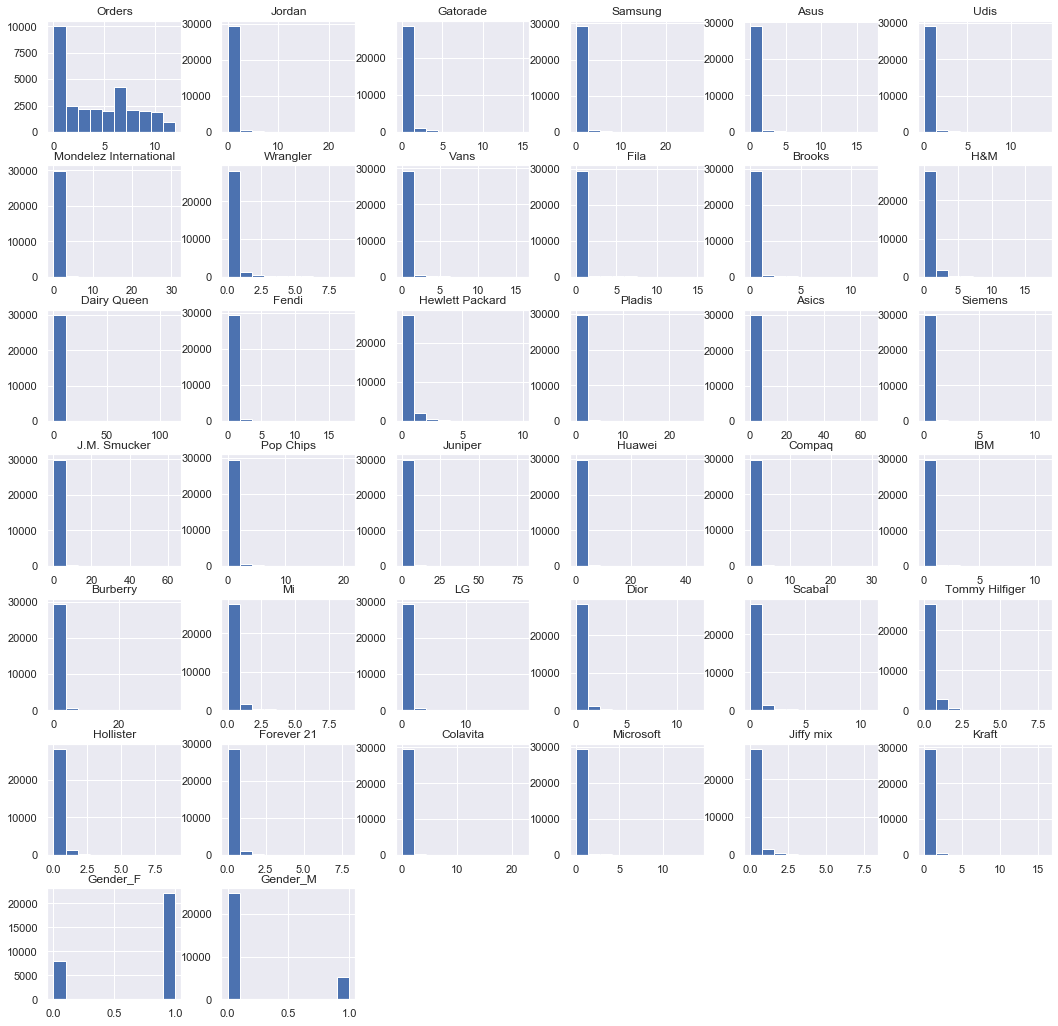

In [15]:
fig = data.hist(figsize = (18,18))


<a id='modeling'></a>
# 4. K-means Clustering


Centroid-based clustering algorithms cluster the data into non-hierarchical clusters. Such algorithms are efficient but sensitive to initial conditions and outliers. K-means is the most widely-used centroid-based clustering algorithm

<a id='preparation_of_data'></a>
## 4.1 Prepare the Data

Feature scaling is used to transform all the variables in the same range. If the variables are not in the same range, then the variable with higher values can dominate our final result. 

The two most discussed scaling methods are normalization and standardization. 



<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> We consider only the brand names to segment the customers. Thus, drop the variables 'Orders', 'Gender_F', 'Gender_M' and scale the remaining variables
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
# 'features' contain only the brand names
features = data.drop(['Orders', 'Gender_F', 'Gender_M'], axis=1)

# head() to display top five rows
features.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cust_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


**Scale the data**

In [17]:
from sklearn.preprocessing import StandardScaler
# instantiate and fit 'StandardScaler' function
scale = StandardScaler().fit(features)       

# scale the 'features' data
features = scale.transform(features)                

In [18]:
# create a dataframe of the scaled features 
features_scaled = pd.DataFrame( features, columns= data.columns[1:36])

# head() to display top five rows
features_scaled.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,-0.297352,-0.406368,-0.187440,-0.267321,-0.266358,-0.205420,-0.268269,-0.141891,-0.598029,-0.342359,-0.349766,-0.304147,-0.198739,-0.12087,-0.389526,-0.253322,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
1,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,0.831805,-0.187440,-0.267321,-0.266358,-0.205420,-0.268269,-0.141891,0.986574,2.419713,0.393100,-0.304147,-0.198739,-0.12087,5.070692,8.097945,-0.210814,1.019864,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
2,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,-0.406368,-0.187440,-0.267321,-0.266358,-0.205420,1.518804,-0.141891,0.194272,-0.342359,-0.349766,-0.304147,-0.198739,-0.12087,-0.389526,-0.253322,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775
3,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,0.831805,-0.187440,-0.267321,-0.266358,-0.205420,-0.268269,-0.141891,-0.598029,1.038677,-0.349766,-0.304147,-0.198739,-0.12087,-0.389526,-0.253322,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
4,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,-0.406368,0.707974,-0.267321,-0.266358,9.475052,0.625267,-0.141891,1.778876,-0.342359,0.393100,-0.304147,-0.198739,-0.12087,0.520510,-0.253322,-0.210814,-0.379382,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>Thus, we have scaled all the features in the data and stored it in a dataframe named 'features_scaled'</b>
                </font>
            </div>
        </td>
    </tr>
</table>



<a id='model_k'></a>
## 4.2 Build a Model with Multiple K


<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> We build our models using the silhouette score method. 
The silhouette is a method of interpretation and validation of consistency within clusters of data
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**We do not know how many clusters give the most useful results. So, we create the clusters varying K, from 4 to 8 and then decide the optimum number of clusters (K) with the help of the silhouette score**

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# create a list for different values of K
n_clusters = [4, 5, 6, 7, 8]

# use 'for' loop to build the clusters
# 'random_state' returns the same sample each time you run the code  
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for K in n_clusters :
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(features_scaled)
    
    score = silhouette_score(features_scaled, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 4, silhouette score is 0.2888293666050969)
For n_clusters = 5, silhouette score is 0.2734507732644251)
For n_clusters = 6, silhouette score is 0.21945733520583066)
For n_clusters = 7, silhouette score is 0.20381188273491752)
For n_clusters = 8, silhouette score is 0.19969011593383135)


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The optimum value for K is associated with the high value of the 'silhouette score'. From the above output it can be seen that, for K = 4, the silhouette score is highest. Thus, we build the clusters with K = 4</b>
                </font>
            </div>
        </td>
    </tr>
</table>



In [20]:
# building a K-Means model for K = 4
model = KMeans(n_clusters= 4, random_state= 10)

# fit the model
model.fit(features_scaled)

KMeans(n_clusters=4, random_state=10)

**Now, explore these 4 clusters to gain some insights about the clusters**

<a id='retrieve_clusters'></a>
# 5. Retrieve the Clusters



<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> As we have built the 4 clusters, now we want to know which customers belong to which cluster. 'model.labels_' can give the cluster number in which the customer belongs
                      </b>
                </font>
            </div>
        </td>
    </tr>

</table>

In [21]:
data_output = data.copy(deep = True)
# add a column 'Cluster' in the data giving cluster number corresponding to each observation
data_output['Cluster'] = model.labels_

# head() to display top five rows
data_output.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M,Cluster
Cust_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,1,0,2
3,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
5,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1,0,0,0


**We have added a column 'cluster' in the dataframe describing the cluster number for each observation**

#### Check the size of each cluster

In [22]:
# 'return_counts = True' gives the number observation in each cluster
np.unique(model.labels_, return_counts=True)                

(array([0, 1, 2, 3]), array([ 1255, 22772,  5272,   701], dtype=int64))

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>Plot a barplot to visualize the cluster sizes</b>
                </font>
            </div>
        </td>
    </tr>
</table>



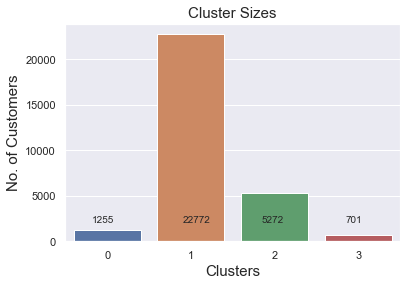

In [23]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= data_output, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('No. of Customers', fontsize = 15)

# add values in the graph
# 'x' and 'y' assigns the position to the text
# 's' represents the text on the plot
plt.text(x = -0.18, y =2000, s = np.unique(model.labels_, return_counts=True)[1][0])
plt.text(x = 0.9, y =2000, s = np.unique(model.labels_, return_counts=True)[1][1])
plt.text(x = 1.85, y =2000, s = np.unique(model.labels_, return_counts=True)[1][2])
plt.text(x = 2.85, y =2000, s = np.unique(model.labels_, return_counts=True)[1][3])

plt.show()

**The first cluster is the largest cluster containing 22573 customers**

#### Cluster Centers

The cluster centers can give information about the variables belonging to the clusters


In [24]:
model.cluster_centers_.shape

(4, 35)

In [25]:
# form a dataframe containing cluster centers
# 'cluster_centers_' returns the co-ordinates of a cluster center 
centers = pd.DataFrame(model.cluster_centers_, columns=  data_output.columns[1:36])      

In [26]:
# head() to display top five rows
centers.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0.446911,0.464653,0.233811,0.158847,0.102969,0.253960,0.317851,0.385554,0.095476,0.808415,0.625607,1.907329,0.616519,0.225042,2.568363,0.365394,-0.024283,1.207535,1.386412,0.361136,0.139219,0.106599,0.032785,2.556671,0.447053,1.396351,0.631866,0.290554,1.137030,0.335733,0.417016,1.391345,0.806428,1.575620,1.922702
1,-0.158476,-0.157536,-0.084381,-0.116934,-0.121153,-0.087155,-0.113422,-0.076786,-0.039016,-0.123452,-0.158799,-0.091024,-0.068992,-0.055305,-0.123492,-0.120399,-0.114161,-0.112618,-0.095141,-0.087916,-0.126187,-0.056312,-0.017300,-0.185835,-0.094772,-0.088160,-0.161581,-0.191656,-0.142253,-0.148547,-0.141765,-0.076493,-0.068999,-0.079321,-0.082740
2,0.594856,0.569990,0.324250,0.474459,0.511302,0.314878,0.430609,0.257115,0.145073,0.358618,0.543847,-0.050482,0.153836,0.199526,-0.067101,-0.066405,-0.114408,0.149411,0.065418,0.285404,0.504460,0.214274,0.067360,0.206156,0.298087,0.061868,0.565501,0.770176,0.350728,0.586942,0.535840,0.003689,0.104907,-0.020615,-0.087260
3,-0.116054,0.008321,-0.110823,-0.046447,-0.085908,0.013628,-0.116023,-0.125255,0.007833,-0.127840,-0.042512,-0.077589,-0.016627,-0.103615,-0.081134,3.757106,4.612421,0.376242,0.118643,0.067765,0.064143,0.030423,-0.002204,-0.085748,0.041534,-0.099359,-0.125881,-0.074137,-0.045926,-0.180266,-0.162539,-0.032771,0.010947,-0.088290,-0.098193


**Now, extract the variables in each of the clusters and try to name each of the cluster based on the variables**

<a id='cluster'></a>
# 6 Clusters Analysis


<a id='cluster_1'></a>
## 6.1 Analysis of Cluster_1

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> Here we analyze the first cluster:<br><br>
                        1. Check the size of a cluster <Br>
                        2. Sort the variables belonging to the cluster <br>
                        3. Compute the statistical summary for observations in the cluster  
                     </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Sort all the variables based on value for the cluster center (i.e., the variable with the highest value of the cluster center will be on top of the sorted list) and store the first ten variables as a list

In [27]:
# sort the variables based on cluster centers
cluster_1 = sorted(zip(list(centers.iloc[0,:]), list(centers.columns)), reverse = True)[:10]     

In [36]:
cluster_1

[(2.5683633928700105, 'Pladis'),
 (2.5566711435400604, 'Burberry'),
 (1.9227024096897447, 'Kraft'),
 (1.9073294208644709, 'Dairy Queen'),
 (1.5756195455231812, 'Jiffy mix'),
 (1.3963507697171846, 'LG'),
 (1.3913445112503917, 'Colavita'),
 (1.386412121421779, 'Pop Chips'),
 (1.2075350473368507, 'J.M. Smucker'),
 (1.1370303957637187, 'Tommy Hilfiger')]

**1. Check size of the cluster**

In [33]:
# size of a cluster_1
np.unique(model.labels_, return_counts=True)

(array([0, 1, 2, 3]), array([ 1255, 22772,  5272,   701], dtype=int64))

There are 22587 customers in this cluster. This is the largest cluster among all the clusters

**2. Sort variables belonging to the cluster**

In [37]:
# retrieve the top 10 variables present in the cluster
cluster1_var = pd.DataFrame(cluster_1)[1]
cluster1_var

0            Pladis
1          Burberry
2             Kraft
3       Dairy Queen
4         Jiffy mix
5                LG
6          Colavita
7         Pop Chips
8      J.M. Smucker
9    Tommy Hilfiger
Name: 1, dtype: object

<table align="left">
   <tr>
        <td width="8%">
           <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Most of the customers belonging to this cluster have searched for electronics, apparels as well as grocery brands like HP, Apple, Prada, Reebok, Pillsbury, Bertolli, and so on. Thus, we can segment this cluster under 'Basket class'</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**3. Compute the statistical summary for observations in the cluster**

In [38]:
# get summary for observations in the cluster
# consider the number of orders and customer gender for cluster analysis
data_output[['Orders', 'Gender_F', 'Gender_M', 'Cluster']][data_output.Cluster == 0].describe()

,Orders,Gender_F,Gender_M,Cluster
count,1255.000000,1255.000000,1255.000000,1255.0
mean,4.146614,0.821514,0.120319,0.0
std,3.630131,0.383074,0.325464,0.0
min,0.000000,0.000000,0.000000,0.0
25%,1.000000,1.000000,0.000000,0.0
50%,4.000000,1.000000,0.000000,0.0
75%,7.000000,1.000000,0.000000,0.0
max,12.000000,1.000000,1.000000,0.0


The proportion of both male and female customers is proportionate in this cluster as compared to the overall gender proportion in the dataset

 <a id='cluster_2'></a>
## 6.2 Analysis of Cluster_2

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Here we analyze the second cluster:<br><br>
                        1. Check the size of a cluster <Br>
                        2. Sort the variables belonging to the cluster <br>
                        3. Compute the statistical summary for observations in the cluster         </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [61]:
# sort the variables based on cluster centers
cluster_2 = sorted(zip(list(centers.iloc[1,:]), list(centers.columns)), reverse = True)[:10]     

**1. Check the size of a cluster**

In [62]:
# size of a cluster_2
np.unique(model.labels_, return_counts=True)[1][1]

561

561 customers belong to cluster_2. This is the smallest cluster

**2. Sort variables belonging to the cluster**

In [63]:
# retrieve the top 10 variables present in the cluster
cluster2_var = pd.DataFrame(cluster_2)[1]
cluster2_var        

0         Siemens
1           Asics
2    J.M. Smucker
3       Pop Chips
4          Huawei
5              Mi
6        Gatorade
7         Juniper
8          Compaq
9            Fila
Name: 1, dtype: object

<table align="left">
   <tr>
        <td width="8%">
           <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>It can be observed that most of the customers in this cluster have searched for electronics brands like Bosch, Samsung, OnePlus and so on. Thus, we can segment this cluster under 'Electronics'
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>







**3. Compute the statistical summary for observations in the cluster**

In [65]:
# get summary for observations in the cluster
# consider the number of orders and customer gender for cluster analysis
data_output[['Orders', 'Gender_F', 'Gender_M', 'Cluster']][data_output.Cluster == 1].describe()

,Orders,Gender_F,Gender_M,Cluster
count,561.000000,561.000000,561.000000,561.0
mean,4.406417,0.696970,0.212121,1.0
std,3.526263,0.459978,0.409175,0.0
min,0.000000,0.000000,0.000000,1.0
25%,1.000000,0.000000,0.000000,1.0
50%,4.000000,1.000000,0.000000,1.0
75%,7.000000,1.000000,0.000000,1.0
max,12.000000,1.000000,1.000000,1.0


This cluster contains highest male population among all the clusters. But, there is high deviation in both the genders

<a id='cluster_3'></a>
## 6.3 Analysis of Cluster_3

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Here we analyze the third cluster:<br><br>
                        1. Check the size of a cluster <Br>
                        2. Sort the variables belonging to the cluster <br>
                        3. Compute the statistical summary for observations in the cluster         </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [66]:
# sort the variables based on cluster centers
cluster_3 = sorted(zip(list(centers.iloc[2,:]), list(centers.columns)), reverse = True)[:10]   

**1. Check the size of a cluster**

In [67]:
# size of cluster_3
np.unique(model.labels_, return_counts=True)[1][2]

1267

This cluster contains 1267 customers

**2. Sort variables belonging to the cluster**

In [68]:
# retrieve the top 10 variables present in the cluster
cluster3_var = pd.DataFrame(cluster_3)[1]
cluster3_var             

0          Burberry
1            Pladis
2             Kraft
3       Dairy Queen
4         Jiffy mix
5                LG
6         Pop Chips
7          Colavita
8      J.M. Smucker
9    Tommy Hilfiger
Name: 1, dtype: object

<table align="left">
   <tr>
        <td width="8%">
           <img src="note.png">
        </td>
       <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This cluster contains the customers who have searched for food brands like Nestle, Buskin-Robbin's,  Pillsbury, and so on. Thus, we can segment this cluster under 'Grocery' 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>









**3. Compute the statistical summary for observations in the cluster**

In [70]:
# get summary for observations in the cluster
# consider the number of orders and customer gender for cluster analysis
data_output[['Orders', 'Gender_F', 'Gender_M', 'Cluster']][data_output.Cluster == 2].describe()

,Orders,Gender_F,Gender_M,Cluster
count,1267.000000,1267.000000,1267.000000,1267.0
mean,4.132597,0.820047,0.121547,2.0
std,3.631063,0.384300,0.326891,0.0
min,0.000000,0.000000,0.000000,2.0
25%,1.000000,1.000000,0.000000,2.0
50%,4.000000,1.000000,0.000000,2.0
75%,7.000000,1.000000,0.000000,2.0
max,12.000000,1.000000,1.000000,2.0


It can be observed that there is a majority of female customers (with mean 0.82) in this cluster. 

<a id='cluster_4'></a>
## 6.4 Analysis of Cluster_4

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Here we analyze the fourth cluster:<br><br>
                        1. Check the size of a cluster <Br>
                        2. Sort the variables belonging to the cluster <br>
                        3. Compute the statistical summary for observations in the cluster         </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [71]:
# sort the variables based on cluster centers
cluster_4 = sorted(zip(list(centers.iloc[3,:]), list(centers.columns)), reverse=True)[:10]   

**1. Check the size of a cluster**

In [72]:
# size of cluster_4
np.unique(model.labels_, return_counts=True)[1][3]

5585

This cluster contains 5585 customers

**2. Sort variables belonging to the cluster**

In [73]:
# retrieve the top 10 variables present in the cluster
cluster4_var = pd.DataFrame(cluster_4)[1]
cluster4_var             

0        Scabal
1        Jordan
2          Dior
3           H&M
4     Hollister
5      Gatorade
6        Huawei
7          Udis
8          Asus
9    Forever 21
Name: 1, dtype: object

<table align="left">
   <tr>
        <td width="8%">
           <img src="note.png">
        </td>
       <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This cluster contains the customers who have searched for clothing brands like Scabal, Jordan, Dior, H&M, and so on. Thus, we can segment this cluster under 'Apperals' 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>









**3. Compute the statistical summary for observations in the cluster**

In [74]:
# get summary for observations in the cluster
# consider the number of orders and customer gender for cluster analysis
data_output[['Orders', 'Gender_F', 'Gender_M', 'Cluster']][data_output.Cluster==3].describe()

,Orders,Gender_F,Gender_M,Cluster
count,5585.000000,5585.000000,5585.000000,5585.0
mean,4.445121,0.843688,0.088451,3.0
std,3.510408,0.363183,0.283975,0.0
min,0.000000,0.000000,0.000000,3.0
25%,1.000000,1.000000,0.000000,3.0
50%,4.000000,1.000000,0.000000,3.0
75%,7.000000,1.000000,0.000000,3.0
max,12.000000,1.000000,1.000000,3.0


This cluster contains highest female population and lowest male population among all the clusters

<a id='conclusion'></a>
# 7. Conclusion

<table align="left">
   <tr>
      <td width="8%">
           <img src="key.png">
       </td>
         <td>
        <div align="left", style="font-size:120%">
              <font color="#21618C">
                <b>In this case study, we have grouped the customers' dataset into 4 clusters based on the brands they have searched on e-commerce sites. We have used the silhouette score method to find the optimum number of clusters and decided k = 4 as the best pick after analyzing the silhouette score.<br><br>
After applying the K-means algorithm with an optimized number of clusters, we segment the customers under 'Grocery', 'Apparels', 'Electronics', and 'Basket class' categories. These clusters give information about the interest of the customer in the different brands. This type of segmentation can help the e-commerce companies, to know the customer's choices and they can provide more accurate recommendations to the customers                     </b>
                </font>
            </div>
        </td>
    </tr>
</table>